<a href="https://colab.research.google.com/github/LuuQuangHoi/AI_GiuaKy/blob/main/Face1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nhận diện khuôn mặt bài 1
# Lưu Quang Hội - 20146124

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy

In [18]:
folder = '/content/drive/MyDrive/AI_Train/Data_Input/Football Player Recognition/'

img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('ronandinho'):
    output = 1.0
  if file.startswith('ronaldo'):
    output = 2.0
  if file.startswith('pele'):
    output = 3.0
  if file.startswith('messi'):
    output = 4.0
  if file.startswith('ibrahimovic'):
    output = 5.0
  
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)

(393, 100, 100, 3) (393,)


In [19]:
photos = photos.astype('float32')/255.0
print(photos.shape)    

(393, 100, 100, 3)


In [20]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(235, 100, 100, 3)
(235,)
(79, 100, 100, 3)
(79,)
(79, 100, 100, 3)
(79,)


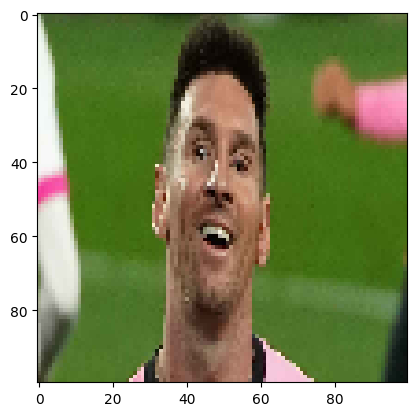

Hinh này là:  3.0


In [22]:
image_test=20
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Hinh này là: ', trainY[image_test])

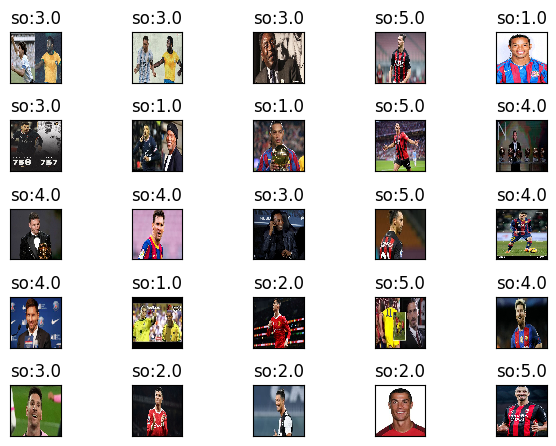

In [23]:
for i in range(25):  # 25 hình ảnh
  plt.subplot(5,5,i+1) # 5 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])

In [24]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(235, 6)
(79, 6)
(79, 6)


In [34]:
batch_size=32
epochs=50
classes = 6

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

In [35]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 1.8276 - accuracy: 0.2128 - val_loss: 1.8447 - val_accuracy: 0.2532
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 1.6187 - accuracy: 0.2894 - val_loss: 1.6906 - val_accuracy: 0.1646
Epoch 3/50
8/8 [==============================] - 10s 1s/step - loss: 1.5111 - accuracy: 0.3277 - val_loss: 1.5413 - val_accuracy: 0.2911
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 1.4417 - accuracy: 0.3830 - val_loss: 1.4433 - val_accuracy: 0.3924
Epoch 5/50
8/8 [==============================] - 10s 1s/step - loss: 1.2238 - accuracy: 0.4553 - val_loss: 1.3330 - val_accuracy: 0.5443
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 1.0601 - accuracy: 0.6298 - val_loss: 1.6184 - val_accuracy: 0.4430
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 1.0163 - accuracy: 0.6255 - val_loss: 1.2363 - val_accuracy: 0.5570
Epoch 8/50
8/8 [=====================

In [36]:
model.save('/content/drive/MyDrive/AI_Train/Model_Train/Model_Face1.h5')

Text(0.5, 0, 'Epoch')

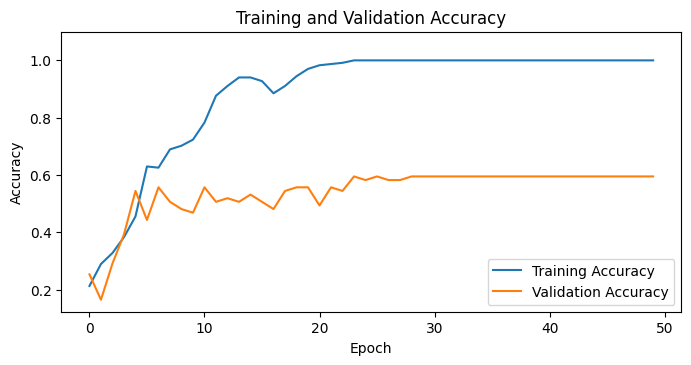

In [37]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

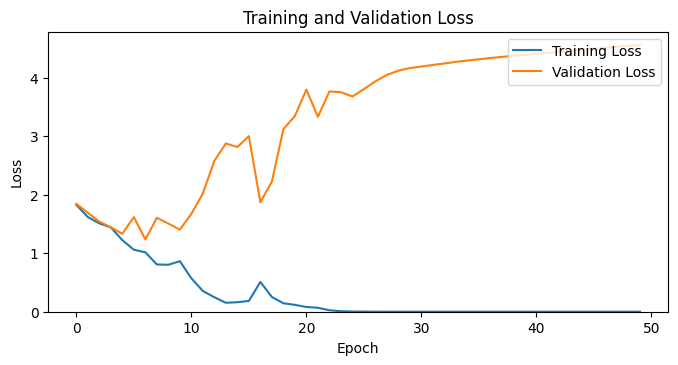

In [38]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

1/1 [==============================] - 0s 40ms/step
Predicted:  ronaldo


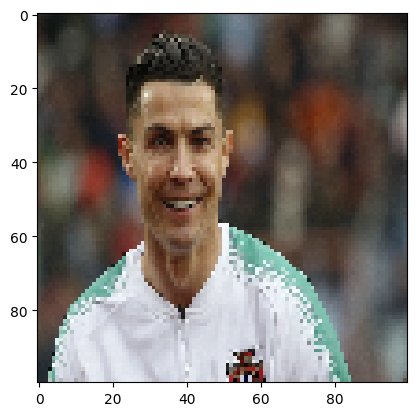

In [41]:
name= {1:'ronandinho', 2:'ronaldo',3:'pele',4:'messi',5:'ibrahimovic'}  
#test
filePath = '/content/drive/MyDrive/AI_Train/Data_Input/Football Player Recognition/ronaldo (20).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)